In [68]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [69]:
# Load the dataset
country_name = "benin" 
file_path = f"./data/{country_name}-malanville.csv"  # Adjust filename as needed

df = pd.read_csv(file_path)

# Display basic info
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
df.head()

Dataset shape: (525600, 19)

Column names:
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [74]:
# Convert Timestamp Column
# Check if Timestamp is already the index
if df.index.name == 'Timestamp':
    print("Timestamp is already set as index.")
    # Convert index to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)
elif 'Timestamp' in df.columns:
    # Convert Timestamp to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # Set Timestamp as index (useful for time series)
    df.set_index('Timestamp', inplace=True)
else:
    # Check for case variations or whitespace
    timestamp_cols = [col for col in df.columns if 'timestamp' in col.lower()]
    if timestamp_cols:
        timestamp_col = timestamp_cols[0]
        print(f"Found timestamp column: '{timestamp_col}'")
        df[timestamp_col] = pd.to_datetime(df[timestamp_col])
        df.set_index(timestamp_col, inplace=True)
    else:
        print("Warning: No Timestamp column found!")
        print(f"Available columns: {df.columns.tolist()}")

# Display data types
print(f"\nIndex name: {df.index.name}")
print(f"Index type: {type(df.index)}")
print(f"\nData types:")
print(df.dtypes)

Timestamp is already set as index.

Index name: Timestamp
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

Data types:
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


In [112]:
# Summary Statistics
# Summary statistics for all numeric columns
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

# Check for columns with all NaN values (these will show NaN in statistics)
print("\n" + "="*60)
print("Checking for columns with missing data:")
print("="*60)
missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_pct
}).sort_values('Missing Percentage', ascending=False)

# Show columns with any missing values
cols_with_missing = missing_report[missing_report['Missing Count'] > 0]
if len(cols_with_missing) > 0:
    print("\nColumns with missing values:")
    print(cols_with_missing)
    
    # Check if any columns are entirely NaN
    all_nan_cols = missing_report[missing_report['Missing Percentage'] == 100]
    if len(all_nan_cols) > 0:
        print(f"\n⚠️  Columns that are 100% NaN (will show NaN in statistics):")
        print(all_nan_cols)
        print("\nThese columns will be dropped during cleaning.")
else:
    print("\n✓ No missing values found in the dataset.")

print("\n" + "="*60)

# Display
summary_stats

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [80]:
# Missing Value Analysis
# Count missing values
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create missing value report
missing_report = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

# Sort by missing percentage (descending)
missing_report = missing_report.sort_values('Missing Percentage', ascending=False)

print("="*60)
print("MISSING VALUE REPORT")
print("="*60)
print("\nMissing Value Report:")
print(missing_report)

# Identify columns with >5% nulls
high_missing = missing_report[missing_report['Missing Percentage'] > 5]
if len(high_missing) > 0:
    print(f"\n⚠️  Columns with >5% missing values:")
    print(high_missing)
else:
    print(f"\n✓ No columns with >5% missing values")

# Check for data quality issues that might cause NaN in statistics
print("\n" + "="*60)
print("DATA QUALITY CHECK (Columns with potential issues)")
print("="*60)

numeric_cols = df.select_dtypes(include=[np.number]).columns
quality_issues = []

for col in numeric_cols:
    col_data = df[col]
    
    # Check if all values are NaN
    if col_data.isna().all():
        quality_issues.append({
            'Column': col,
            'Issue': 'All values are NaN',
            'Details': f'{len(col_data)} NaN values'
        })
    # Check if column has constant values (std = 0, which is fine, but mean should work)
    elif col_data.nunique() == 1 and not col_data.isna().any():
        quality_issues.append({
            'Column': col,
            'Issue': 'Constant values (all same)',
            'Details': f'All values = {col_data.iloc[0]}'
        })
    # Check if statistics can be calculated
    elif pd.isna(col_data.mean()) and not col_data.isna().all():
        quality_issues.append({
            'Column': col,
            'Issue': 'Statistics return NaN (data quality issue)',
            'Details': f'Mean: NaN, Non-null count: {col_data.notna().sum()}'
        })

if quality_issues:
    quality_df = pd.DataFrame(quality_issues)
    print("\n⚠️  Columns with data quality issues:")
    print(quality_df.to_string(index=False))
    print("\nNote: These columns may show NaN in summary statistics.")
    print("They will be handled during the cleaning process.")
else:
    print("\n✓ No data quality issues detected in numeric columns")

print("\n" + "="*60)

MISSING VALUE REPORT

Missing Value Report:
               Missing Count  Missing Percentage
Comments              525600               100.0
GHI                        0                 0.0
DNI                        0                 0.0
DHI                        0                 0.0
ModB                       0                 0.0
ModA                       0                 0.0
RH                         0                 0.0
WS                         0                 0.0
WSgust                     0                 0.0
Tamb                       0                 0.0
WSstdev                    0                 0.0
WD                         0                 0.0
BP                         0                 0.0
WDstdev                    0                 0.0
Cleaning                   0                 0.0
Precipitation              0                 0.0
TModA                      0                 0.0
TModB                      0                 0.0

⚠️  Columns with >5% mis

In [81]:
# Data Types and Basic Info
# Data info
print("Dataset Info:")
print(df.info())

# Check for duplicate rows
print(f"\nDuplicate rows: {df.duplicated().sum()}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-

## Part 3: Outlier Detection & Basic Cleaning


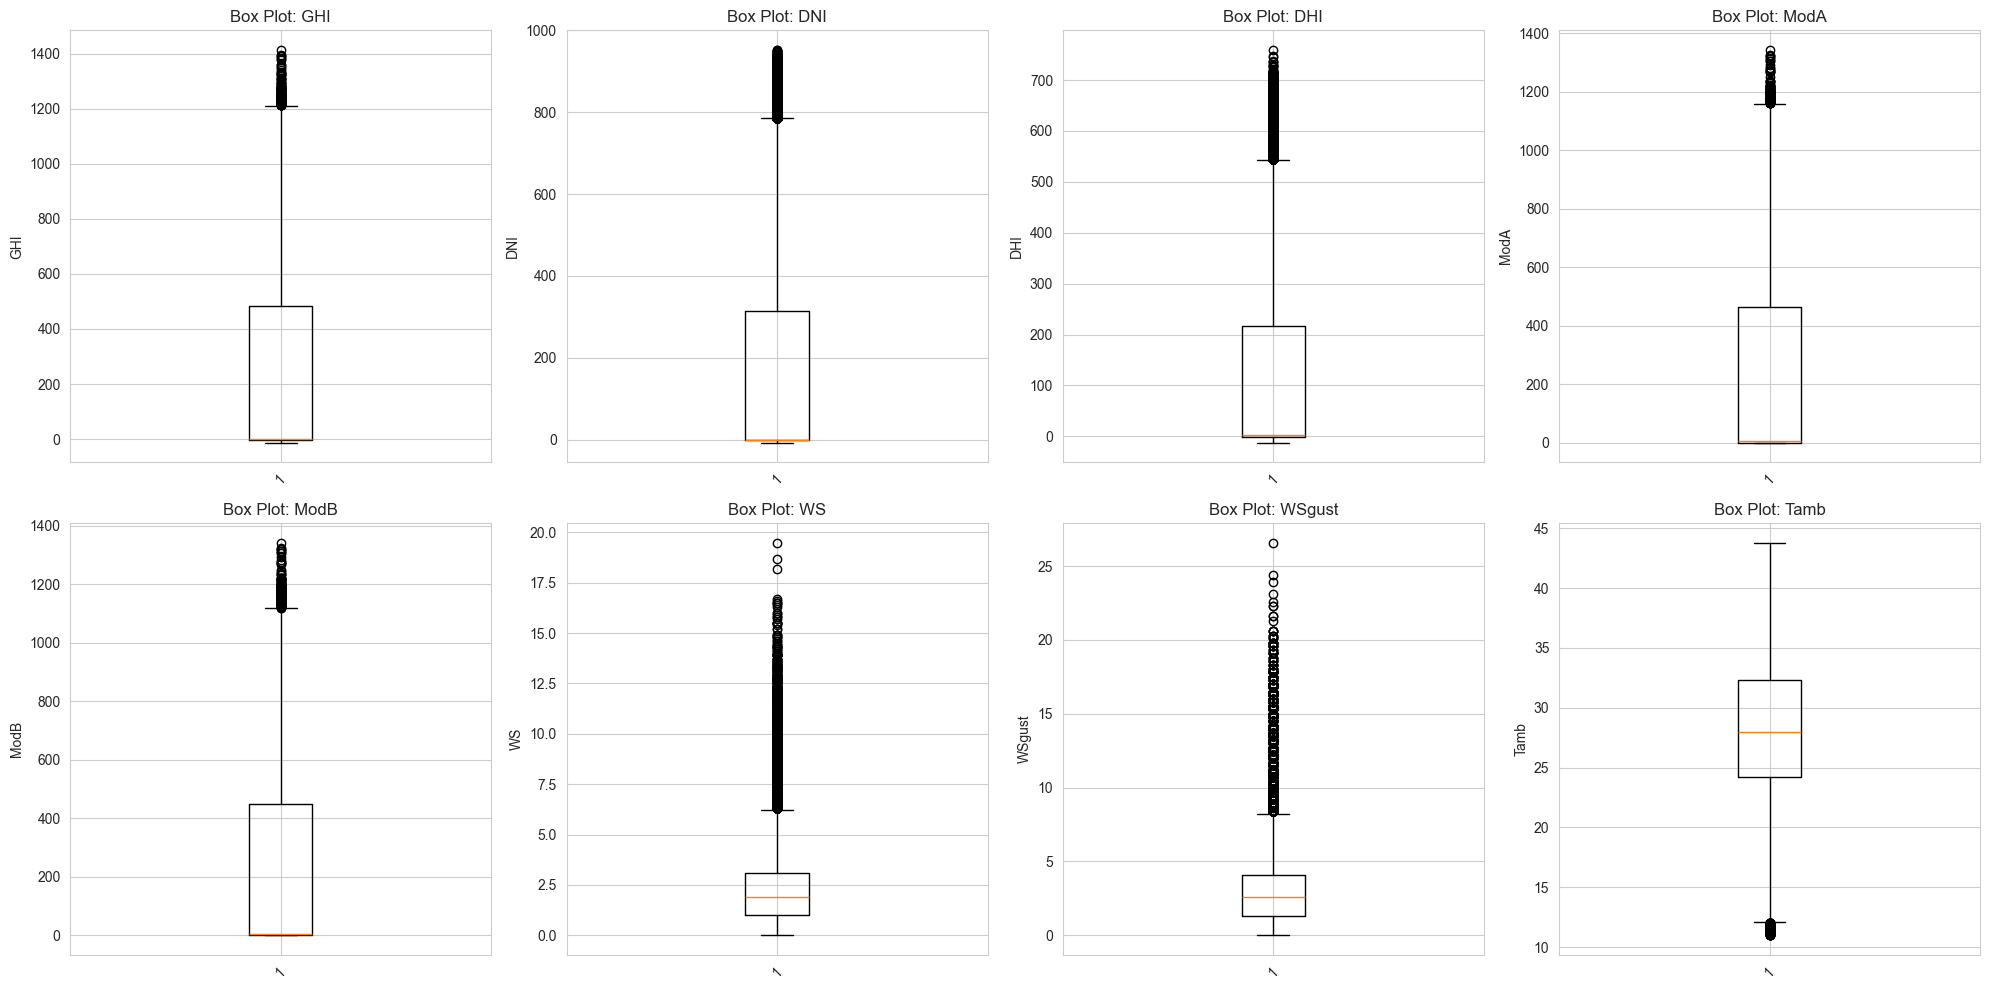

In [82]:
# Outlier Detection & Basic Cleaning

# Visual Outlier Detection (Box Plots)
# Key columns to check for outliers
outlier_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb']

# Create box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(outlier_columns):
    if col in df.columns:
        axes[i].boxplot(df[col].dropna())
        axes[i].set_title(f'Box Plot: {col}')
        axes[i].set_ylabel(col)
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [84]:
# Compute Z-Scores
# Columns for Z-score calculation
zscore_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores
z_scores = {}
outlier_flags = pd.DataFrame(index=df.index)

for col in zscore_columns:
    if col in df.columns:
        # Calculate mean and std
        mean = df[col].mean()
        std = df[col].std()
        
        # Calculate Z-scores
        z_scores[col] = (df[col] - mean) / std
        
        # Flag outliers (|Z| > 3)
        outlier_flags[f'{col}_outlier'] = np.abs(z_scores[col]) > 3

# Display outlier counts
print("Outlier Counts (|Z| > 3):")
for col in zscore_columns:
    if col in df.columns:
        count = outlier_flags[f'{col}_outlier'].sum()
        print(f"{col}: {count} outliers ({count/len(df)*100:.2f}%)")


Outlier Counts (|Z| > 3):
GHI: 89 outliers (0.02%)
DNI: 0 outliers (0.00%)
DHI: 3738 outliers (0.71%)
ModA: 27 outliers (0.01%)
ModB: 63 outliers (0.01%)
WS: 3109 outliers (0.59%)
WSgust: 3500 outliers (0.67%)


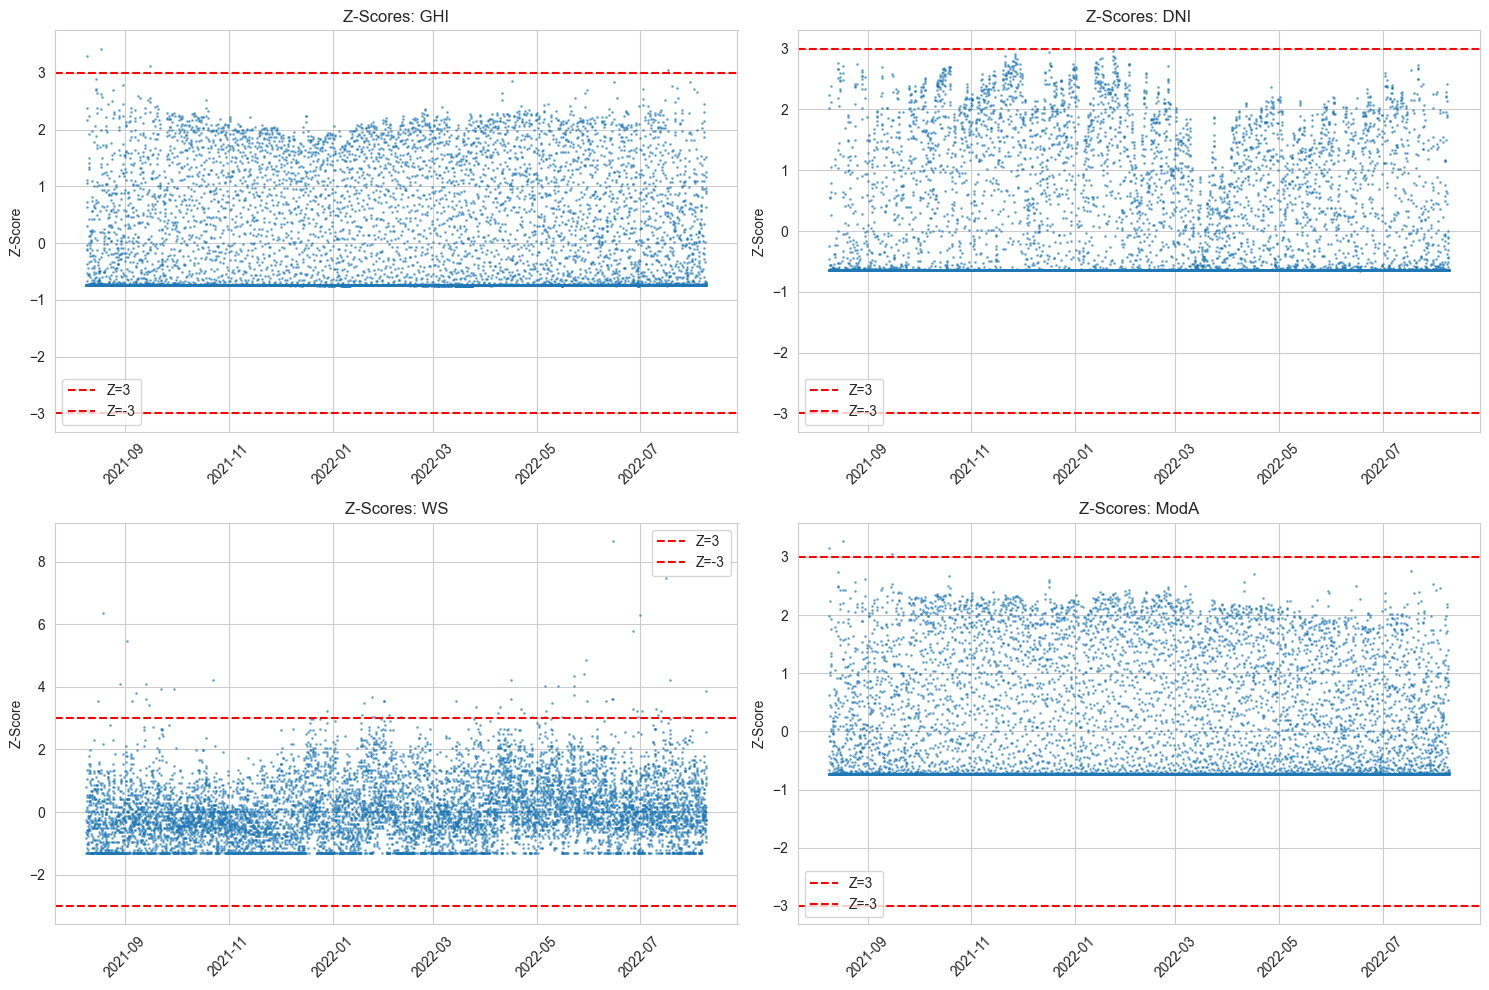

In [85]:
# Visualize Outliers (Z-scores)
# Plot Z-scores for key columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

key_cols = ['GHI', 'DNI', 'WS', 'ModA']
for i, col in enumerate(key_cols):
    if col in df.columns and col in z_scores:
        # Sample for better performance
        sample_indices = np.arange(0, len(df), max(1, len(df)//10000))
        axes[i].scatter(df.index[sample_indices], z_scores[col].iloc[sample_indices], alpha=0.5, s=1)
        axes[i].axhline(y=3, color='r', linestyle='--', label='Z=3')
        axes[i].axhline(y=-3, color='r', linestyle='--', label='Z=-3')
        axes[i].set_title(f'Z-Scores: {col}')
        axes[i].set_ylabel('Z-Score')
        axes[i].legend()
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Part 3.4: Handle Missing Values


In [86]:
# Handle Missing Values
# Create a copy for cleaning
df_clean = df.copy()

# Check for missing values
missing_before = df_clean.isna().sum()
cols_with_missing = missing_before[missing_before > 0]

if len(cols_with_missing) > 0:
    print("Columns with missing values:")
    print(cols_with_missing)
    print("\nStrategy: Impute with median for numeric columns")
    
    # Strategy: Impute with median for numeric columns
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        if df_clean[col].isna().sum() > 0:
            median_value = df_clean[col].median()
            # Only impute if median is not NaN
            if pd.notna(median_value):
                df_clean[col].fillna(median_value, inplace=True)
                print(f"  • Imputed {col}: {df_clean[col].isna().sum()} → 0 missing values (median: {median_value:.2f})")
            else:
                # If median is NaN, drop the column (e.g., Comments column with all NaN)
                print(f"  • Dropping {col}: all values are NaN")
                df_clean.drop(col, axis=1, inplace=True)
else:
    print("No missing values found in the dataset.")
    print("All columns have complete data.")

# Verify no missing values remain
missing_after = df_clean.isna().sum().sum()
print(f"\nSummary:")
print(f"  • Missing values before: {df.isna().sum().sum():,}")
print(f"  • Missing values after: {missing_after:,}")


Columns with missing values:
Comments    525600
dtype: int64

Strategy: Impute with median for numeric columns
  • Dropping Comments: all values are NaN

Summary:
  • Missing values before: 525,600
  • Missing values after: 0


## Part 3.5: Handle Outliers


In [87]:
# Handle Outliers - Cap outliers at 3 standard deviations
key_outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']

# Create combined outlier flag for reporting
df_clean['has_outlier'] = False
for col in key_outlier_cols:
    if col in df.columns:
        df_clean['has_outlier'] = df_clean['has_outlier'] | outlier_flags[f'{col}_outlier']

# Count rows with outliers
outlier_count = df_clean['has_outlier'].sum()
print(f"Rows with outliers in key columns: {outlier_count} ({outlier_count/len(df_clean)*100:.2f}%)")

# Cap outliers at 3 standard deviations (alternative to removal)
for col in key_outlier_cols:
    if col in df_clean.columns:
        mean = df_clean[col].mean()
        std = df_clean[col].std()
        upper_bound = mean + 3 * std
        lower_bound = mean - 3 * std
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"Capped {col} outliers: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Remove the temporary flag
df_clean.drop('has_outlier', axis=1, inplace=True, errors='ignore')


Rows with outliers in key columns: 3829 (0.73%)
Capped GHI outliers: [-752.83, 1233.95]
Capped DNI outliers: [-617.94, 952.32]
Capped DHI outliers: [-360.71, 591.43]
Capped ModA outliers: [-744.10, 1217.27]
Capped ModB outliers: [-720.73, 1178.49]


## Part 3.6: Data Validation


In [89]:
# Data Validation
# Check for logical inconsistencies
print("Data Validation:")
print(f"Negative GHI values: {(df_clean['GHI'] < 0).sum()}")
print(f"Negative DNI values: {(df_clean['DNI'] < 0).sum()}")
print(f"Negative DHI values: {(df_clean['DHI'] < 0).sum()}")

# Check temperature ranges (should be reasonable)
print(f"\nTemperature range: {df_clean['Tamb'].min():.2f} to {df_clean['Tamb'].max():.2f} °C")
print(f"Relative Humidity range: {df_clean['RH'].min():.2f} to {df_clean['RH'].max():.2f} %")
print(f"Wind Speed range: {df_clean['WS'].min():.2f} to {df_clean['WS'].max():.2f} m/s")


Data Validation:
Negative GHI values: 258847
Negative DNI values: 275987
Negative DHI values: 259182

Temperature range: 11.00 to 43.80 °C
Relative Humidity range: 2.10 to 100.00 %
Wind Speed range: 0.00 to 19.50 m/s


## Part 3.7: Export Cleaned Data


In [90]:
# Export Cleaned Data
# Reset index to have Timestamp as column
df_clean_reset = df_clean.reset_index()

# Export to CSV
output_path = f"./data/{country_name}_clean.csv"
df_clean_reset.to_csv(output_path, index=False)
print(f"Cleaned data exported to: {output_path}")
print(f"Shape: {df_clean_reset.shape}")


Cleaned data exported to: ./data/benin_clean.csv
Shape: (525600, 18)


## Part 4: Time Series Analysis


### Part 4.1: Line Charts for Key Metrics


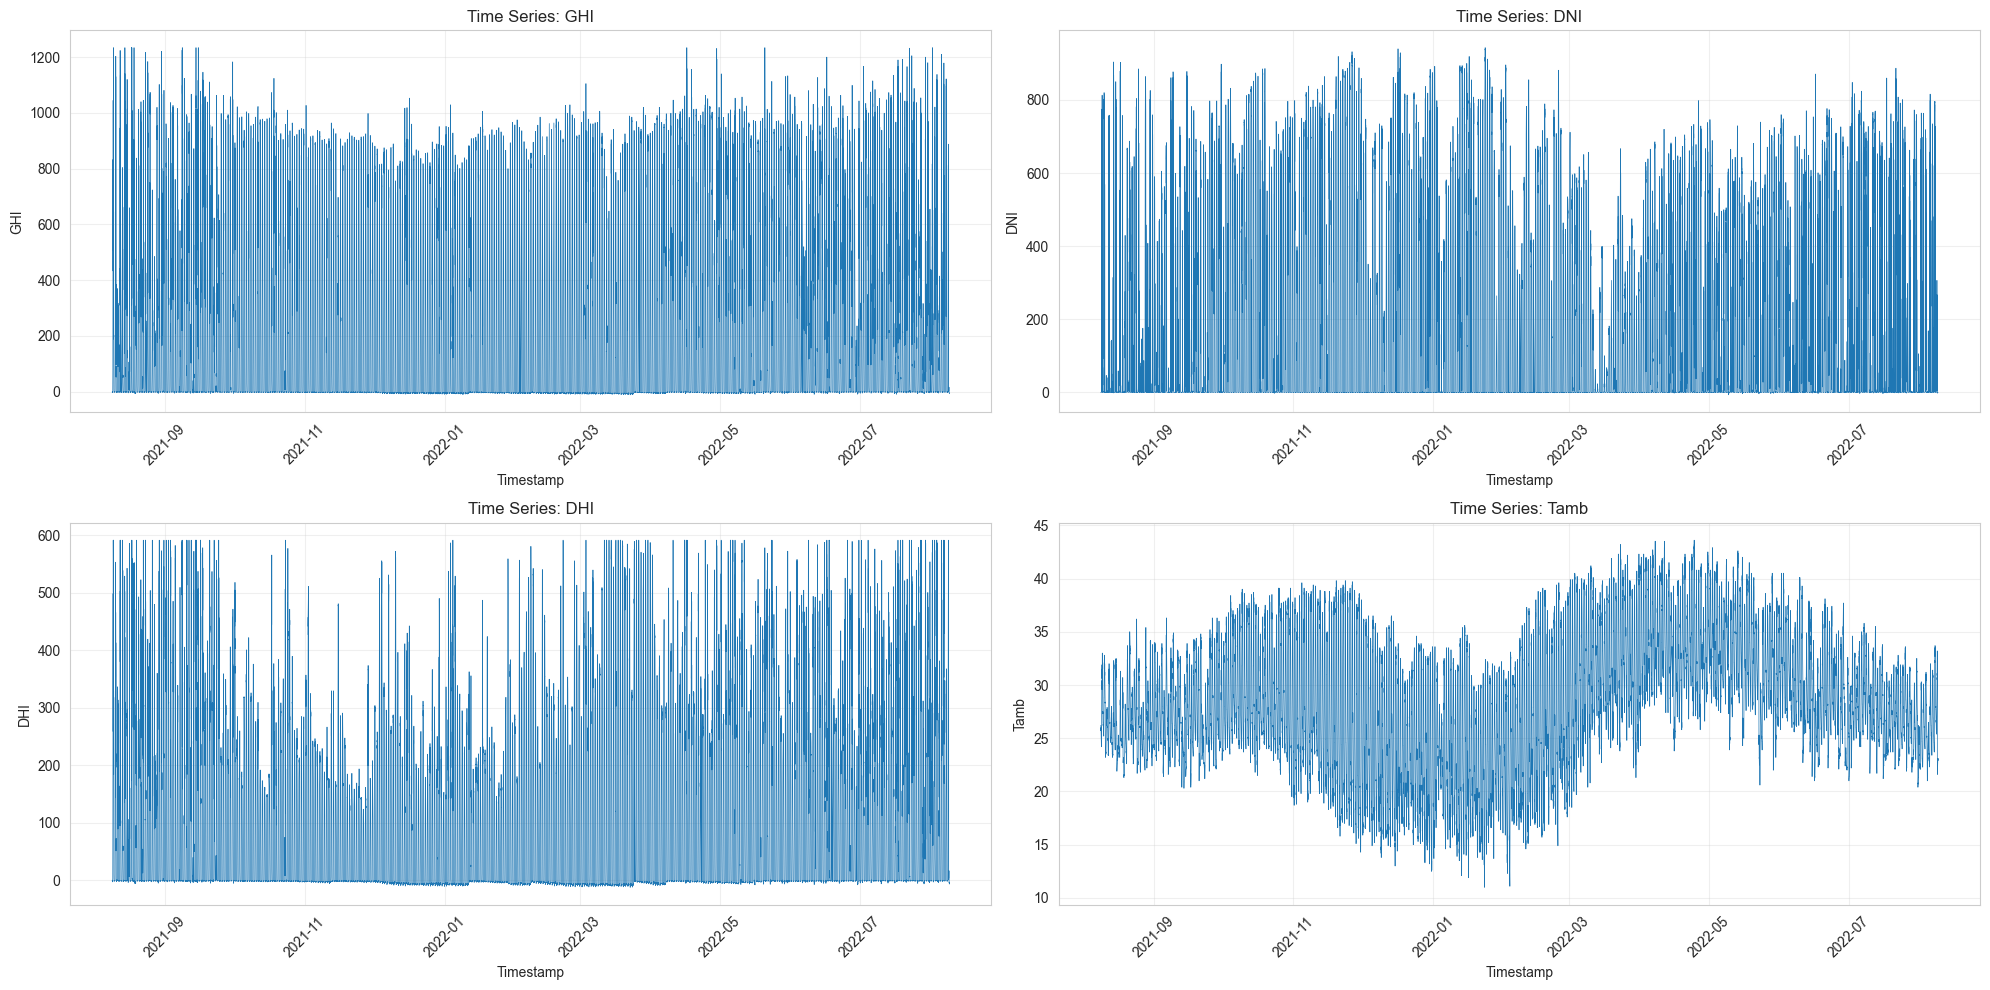

In [91]:
# Time Series: Line Charts for Key Metrics
time_series_cols = ['GHI', 'DNI', 'DHI', 'Tamb']

# Create time series plots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(time_series_cols):
    if col in df_clean.columns:
        # Sample data for better performance (every 10th point)
        sample_df = df_clean[col].iloc[::10]
        axes[i].plot(sample_df.index, sample_df.values, linewidth=0.5)
        axes[i].set_title(f'Time Series: {col}')
        axes[i].set_xlabel('Timestamp')
        axes[i].set_ylabel(col)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Part 4.2: Monthly Patterns


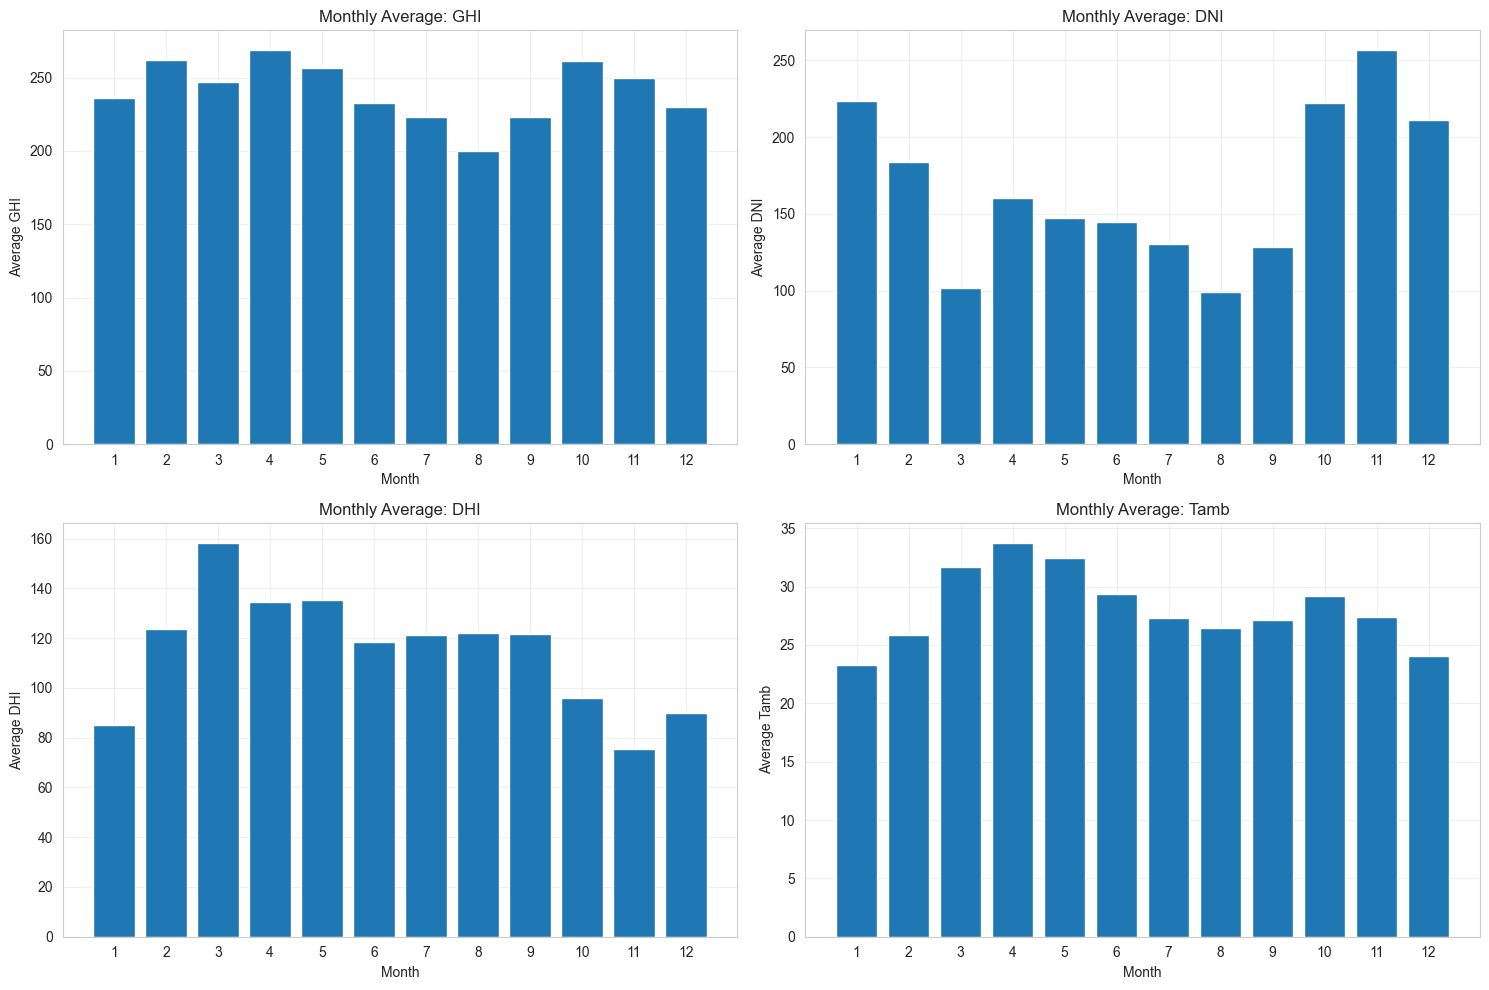

In [92]:
# Monthly Patterns
# Extract month from timestamp
df_clean['Month'] = df_clean.index.month
df_clean['Year'] = df_clean.index.year
df_clean['Hour'] = df_clean.index.hour

# Monthly averages
monthly_avg = df_clean.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot monthly patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(['GHI', 'DNI', 'DHI', 'Tamb']):
    if col in monthly_avg.columns:
        axes[i].bar(monthly_avg.index, monthly_avg[col])
        axes[i].set_title(f'Monthly Average: {col}')
        axes[i].set_xlabel('Month')
        axes[i].set_ylabel(f'Average {col}')
        axes[i].set_xticks(range(1, 13))
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Part 4.3: Daily/Hourly Patterns


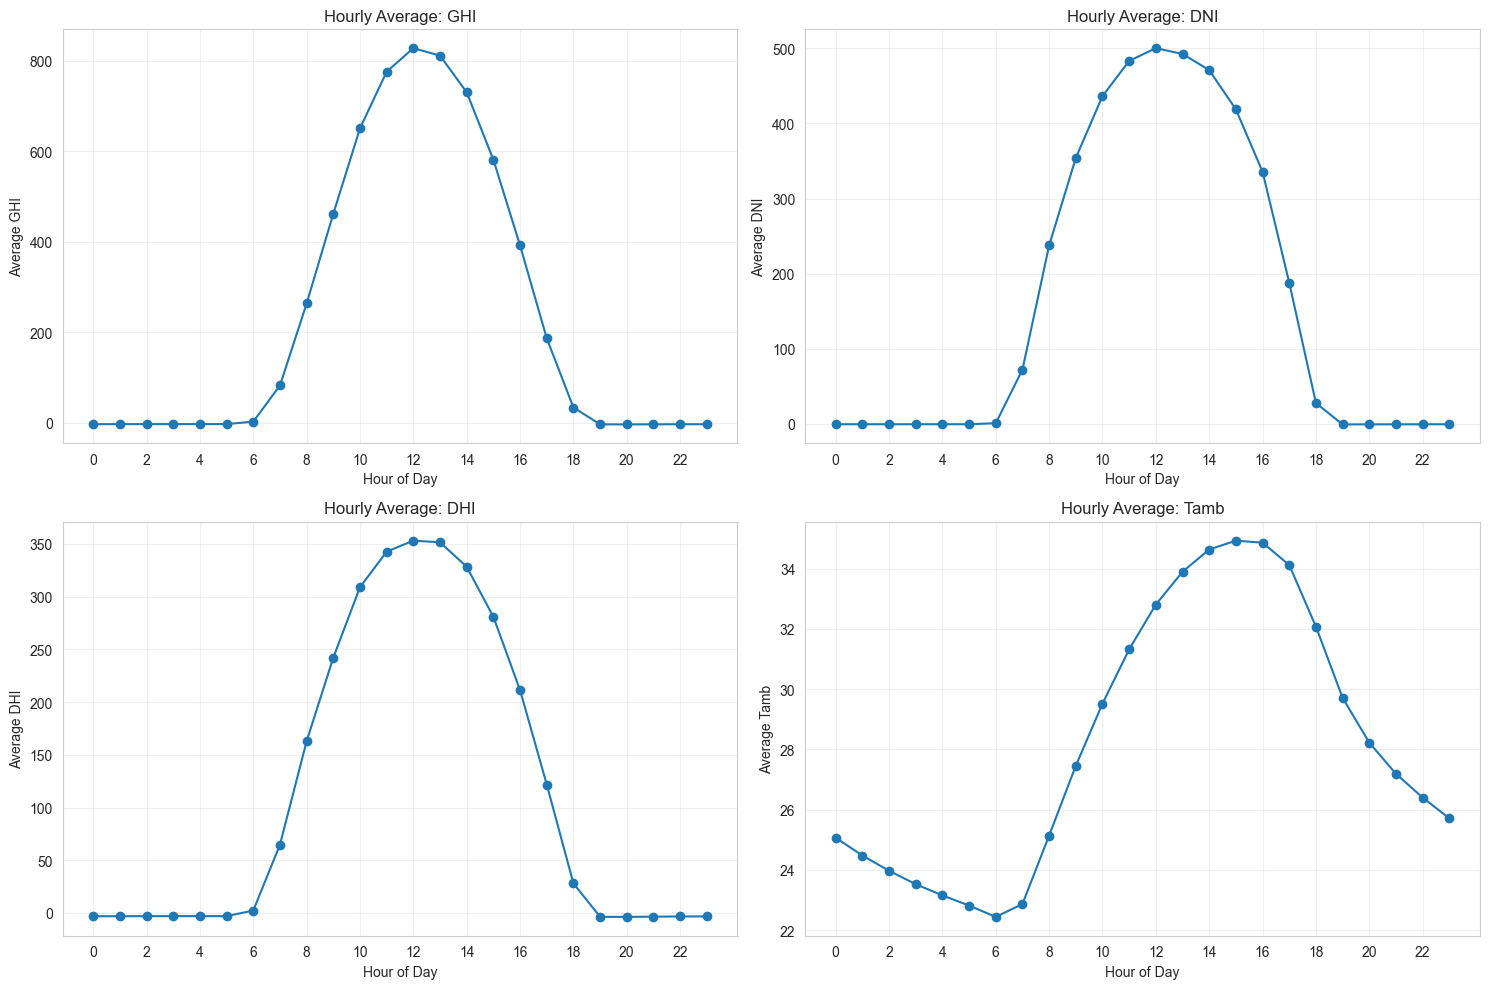

In [93]:
# Hourly Patterns
# Hourly averages
hourly_avg = df_clean.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot hourly patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(['GHI', 'DNI', 'DHI', 'Tamb']):
    if col in hourly_avg.columns:
        axes[i].plot(hourly_avg.index, hourly_avg[col], marker='o')
        axes[i].set_title(f'Hourly Average: {col}')
        axes[i].set_xlabel('Hour of Day')
        axes[i].set_ylabel(f'Average {col}')
        axes[i].set_xticks(range(0, 24, 2))
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Part 4.4: Anomaly Detection


Anomaly days (low GHI): 19
Threshold: 140.68 W/m²


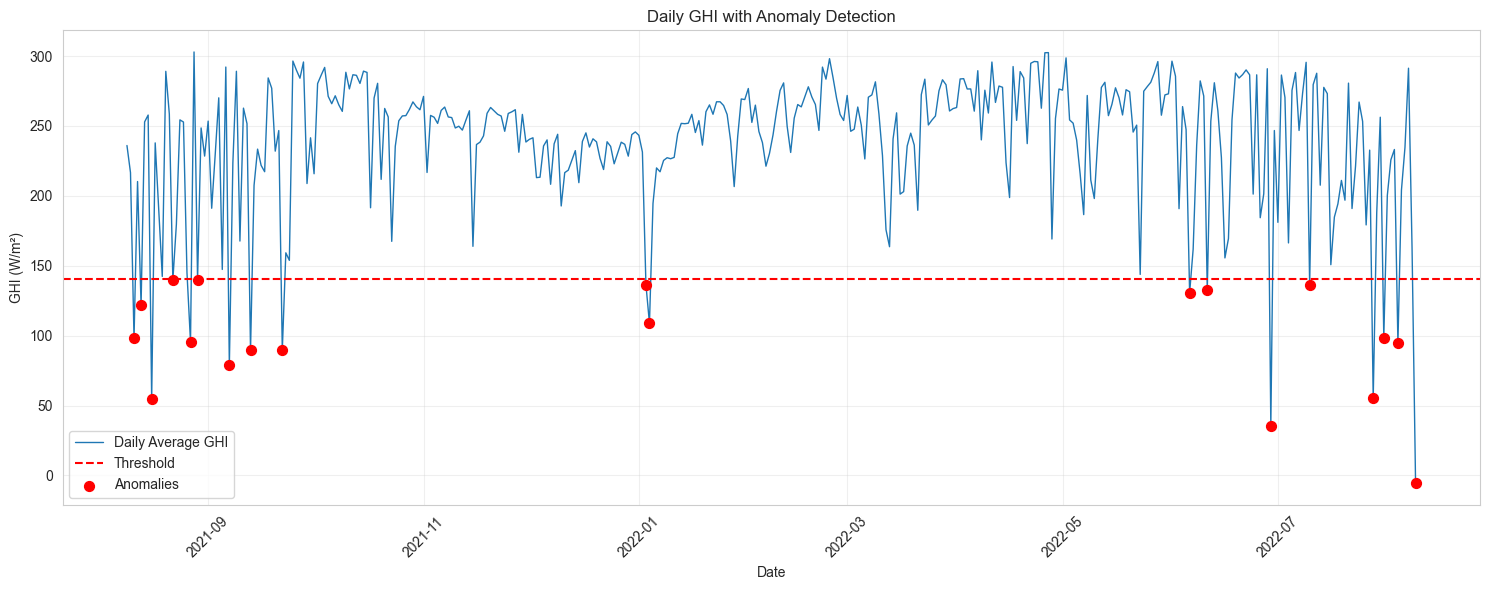

In [94]:
# Anomaly Detection
# Identify anomalies (e.g., sudden drops or spikes)
# Example: Days with unusually low GHI
daily_ghi = df_clean['GHI'].resample('D').mean()
ghi_threshold = daily_ghi.quantile(0.05)  # Bottom 5%

anomaly_days = daily_ghi[daily_ghi < ghi_threshold]

print(f"Anomaly days (low GHI): {len(anomaly_days)}")
print(f"Threshold: {ghi_threshold:.2f} W/m²")

# Plot anomalies
plt.figure(figsize=(15, 6))
plt.plot(daily_ghi.index, daily_ghi.values, label='Daily Average GHI', linewidth=1)
plt.axhline(y=ghi_threshold, color='r', linestyle='--', label='Threshold')
if len(anomaly_days) > 0:
    plt.scatter(anomaly_days.index, anomaly_days.values, color='red', s=50, label='Anomalies', zorder=5)
plt.title('Daily GHI with Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Part 5: Cleaning Impact Analysis


In [96]:
# Cleaning Impact Analysis
# Check cleaning events
cleaning_counts = df_clean['Cleaning'].value_counts()
print("Cleaning Events:")
print(cleaning_counts)

# Average ModA and ModB before and after cleaning
cleaning_impact = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("\nAverage Module Readings by Cleaning Flag:")
print(cleaning_impact)


Cleaning Events:
Cleaning
0    525115
1       485
Name: count, dtype: int64

Average Module Readings by Cleaning Flag:
                ModA        ModB
Cleaning                        
0         236.521583  228.810392
1         307.229278  301.972165


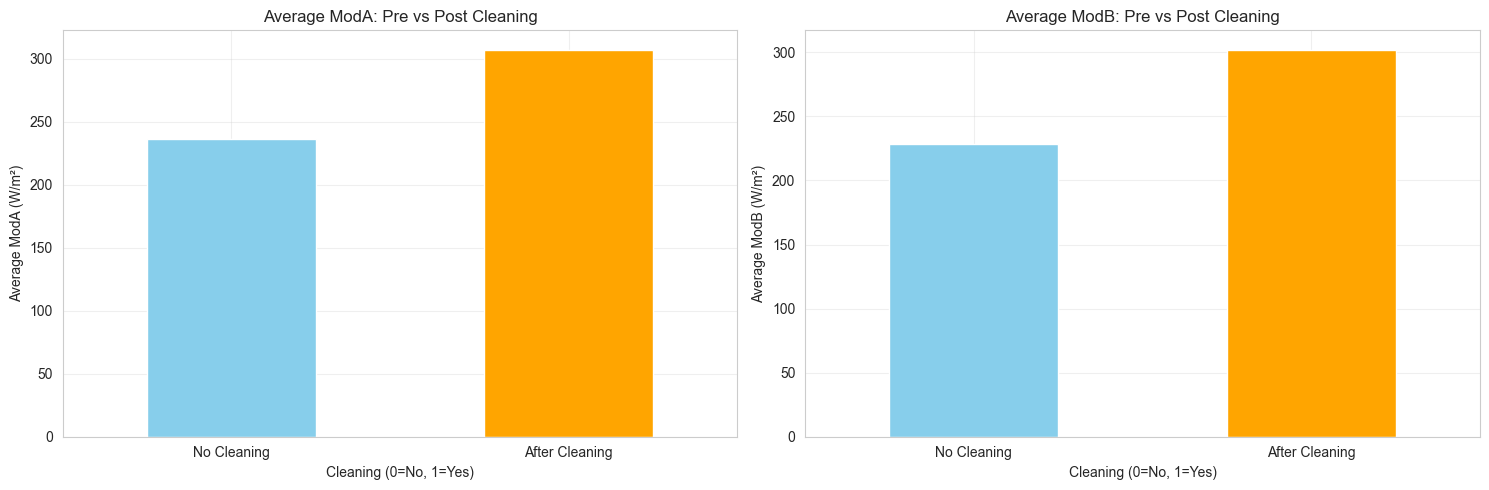

In [97]:
# Visualize Cleaning Impact
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ModA comparison
cleaning_impact['ModA'].plot(kind='bar', ax=axes[0], color=['skyblue', 'orange'])
axes[0].set_title('Average ModA: Pre vs Post Cleaning')
axes[0].set_xlabel('Cleaning (0=No, 1=Yes)')
axes[0].set_ylabel('Average ModA (W/m²)')
axes[0].set_xticklabels(['No Cleaning', 'After Cleaning'], rotation=0)
axes[0].grid(True, alpha=0.3)

# ModB comparison
cleaning_impact['ModB'].plot(kind='bar', ax=axes[1], color=['skyblue', 'orange'])
axes[1].set_title('Average ModB: Pre vs Post Cleaning')
axes[1].set_xlabel('Cleaning (0=No, 1=Yes)')
axes[1].set_ylabel('Average ModB (W/m²)')
axes[1].set_xticklabels(['No Cleaning', 'After Cleaning'], rotation=0)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


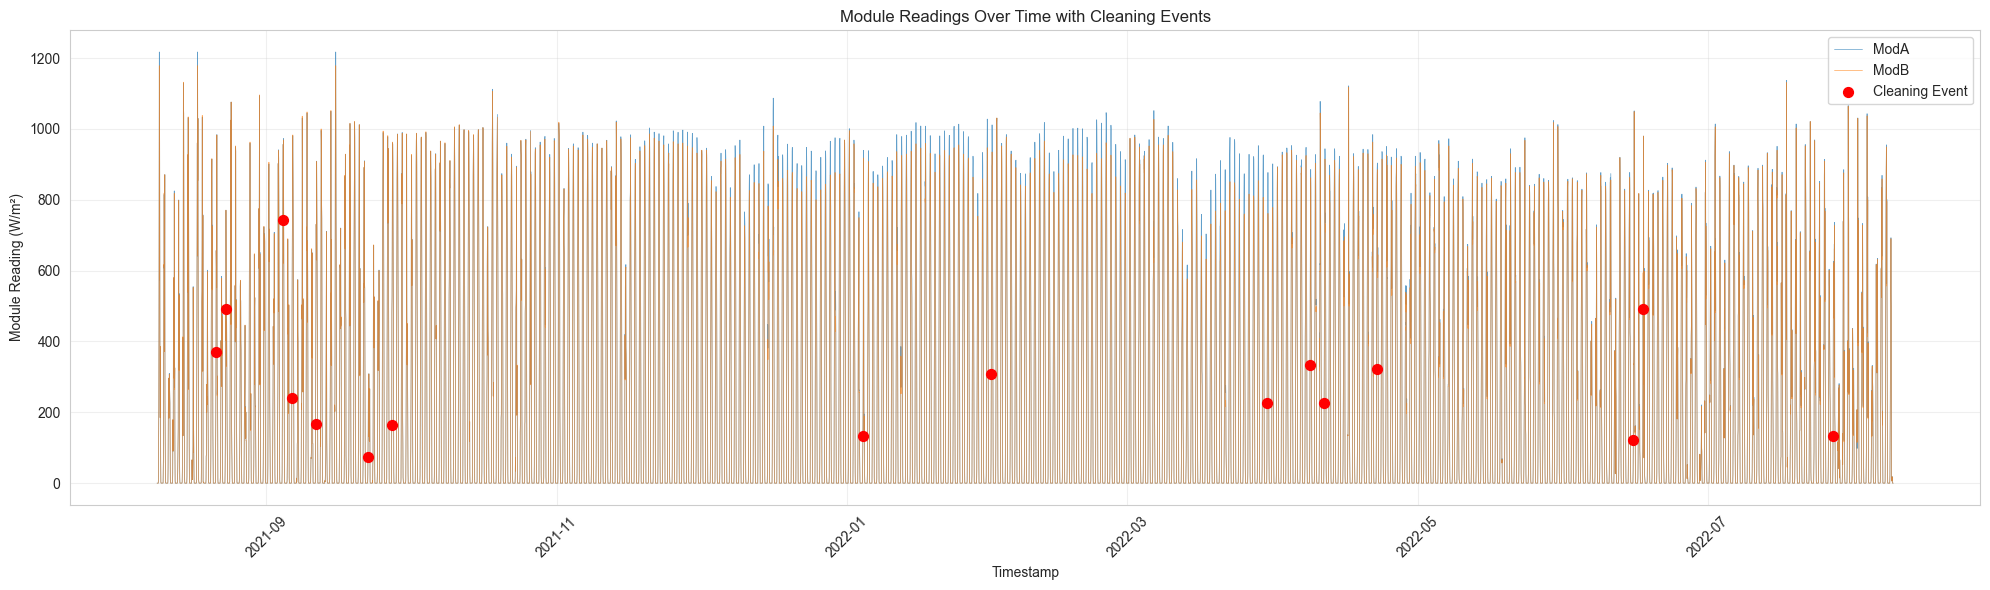

In [98]:
# Time Series of Cleaning Events
# Plot ModA and ModB over time, highlighting cleaning events
fig, ax = plt.subplots(figsize=(20, 6))

# Sample data for performance
sample_size = min(10000, len(df_clean))
sample_df = df_clean.iloc[::len(df_clean)//sample_size]

ax.plot(sample_df.index, sample_df['ModA'], label='ModA', alpha=0.7, linewidth=0.5)
ax.plot(sample_df.index, sample_df['ModB'], label='ModB', alpha=0.7, linewidth=0.5)

# Highlight cleaning events
cleaning_times = sample_df[sample_df['Cleaning'] == 1].index
if len(cleaning_times) > 0:
    ax.scatter(cleaning_times, sample_df.loc[cleaning_times, 'ModA'], 
               color='red', s=50, label='Cleaning Event', zorder=5)

ax.set_title('Module Readings Over Time with Cleaning Events')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Module Reading (W/m²)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Part 6: Correlation & Relationship Analysis


### Part 6.1: Correlation Heatmap


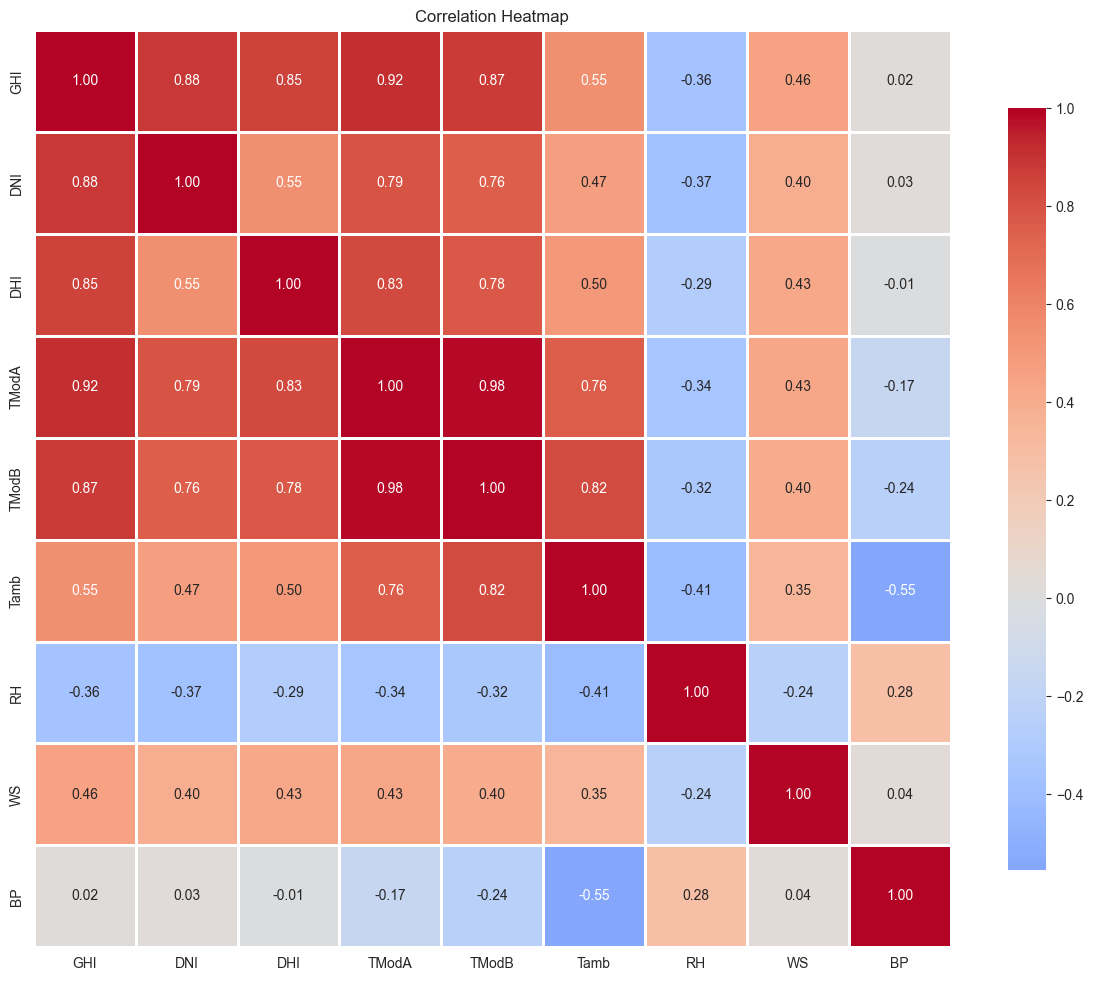

In [99]:
# Correlation Heatmap
# Select columns for correlation
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'BP']

# Calculate correlation matrix
corr_matrix = df_clean[corr_columns].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


### Part 6.2: Scatter Plots - Wind vs GHI


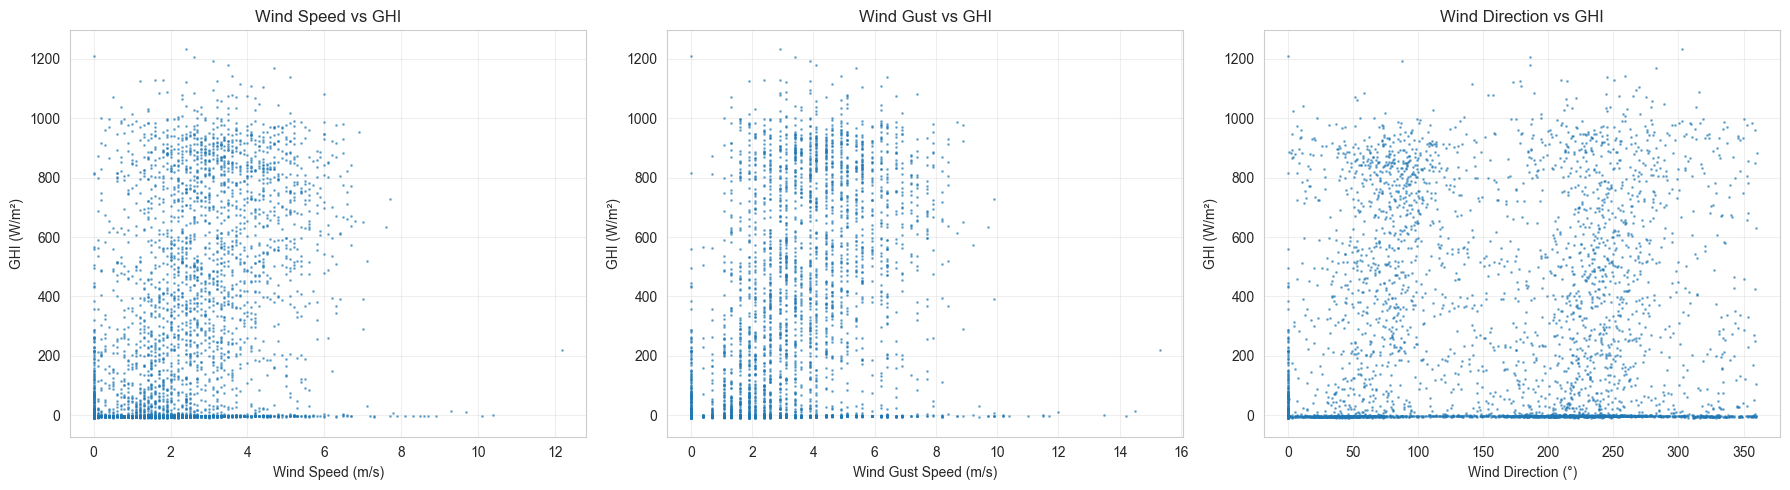

In [100]:
# Scatter Plots: Wind vs GHI
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sample data for better performance
sample_size = min(5000, len(df_clean))
sample_df = df_clean.sample(n=sample_size, random_state=42)

# WS vs GHI
axes[0].scatter(sample_df['WS'], sample_df['GHI'], alpha=0.5, s=1)
axes[0].set_xlabel('Wind Speed (m/s)')
axes[0].set_ylabel('GHI (W/m²)')
axes[0].set_title('Wind Speed vs GHI')
axes[0].grid(True, alpha=0.3)

# WSgust vs GHI
axes[1].scatter(sample_df['WSgust'], sample_df['GHI'], alpha=0.5, s=1)
axes[1].set_xlabel('Wind Gust Speed (m/s)')
axes[1].set_ylabel('GHI (W/m²)')
axes[1].set_title('Wind Gust vs GHI')
axes[1].grid(True, alpha=0.3)

# WD vs GHI
axes[2].scatter(sample_df['WD'], sample_df['GHI'], alpha=0.5, s=1)
axes[2].set_xlabel('Wind Direction (°)')
axes[2].set_ylabel('GHI (W/m²)')
axes[2].set_title('Wind Direction vs GHI')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Part 6.3: Scatter Plots - RH vs Temperature and GHI


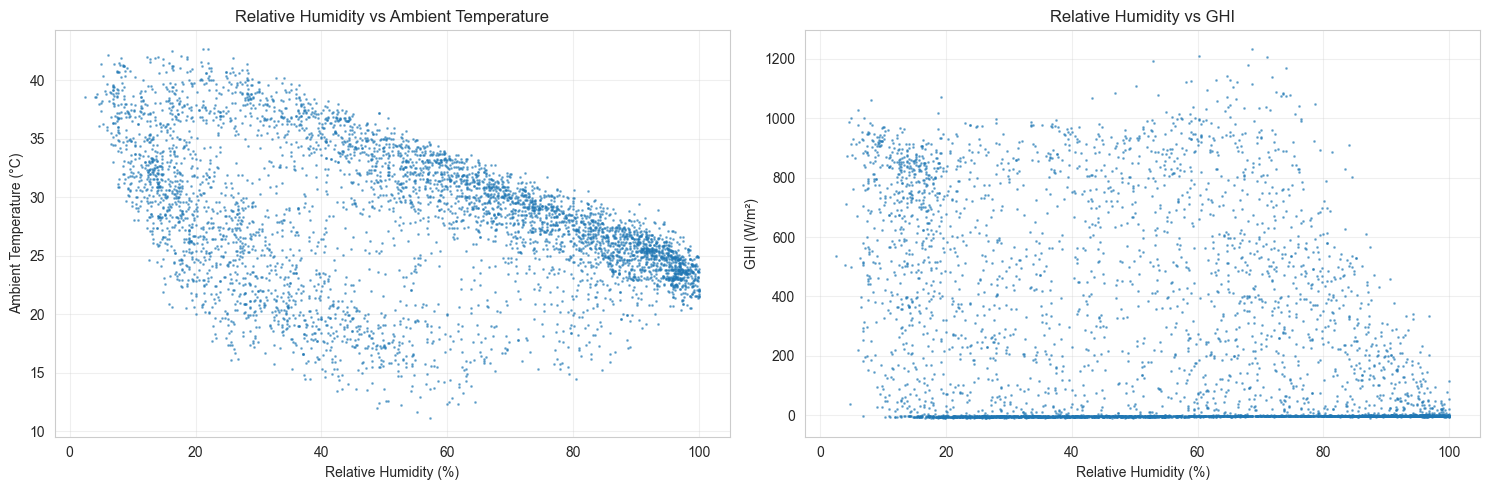

In [101]:
# Scatter Plots: RH vs Temperature and GHI
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sample data
sample_df = df_clean.sample(n=sample_size, random_state=42)

# RH vs Tamb
axes[0].scatter(sample_df['RH'], sample_df['Tamb'], alpha=0.5, s=1)
axes[0].set_xlabel('Relative Humidity (%)')
axes[0].set_ylabel('Ambient Temperature (°C)')
axes[0].set_title('Relative Humidity vs Ambient Temperature')
axes[0].grid(True, alpha=0.3)

# RH vs GHI
axes[1].scatter(sample_df['RH'], sample_df['GHI'], alpha=0.5, s=1)
axes[1].set_xlabel('Relative Humidity (%)')
axes[1].set_ylabel('GHI (W/m²)')
axes[1].set_title('Relative Humidity vs GHI')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Part 7: Wind & Distribution Analysis


### Part 7.1: Wind Rose Plot


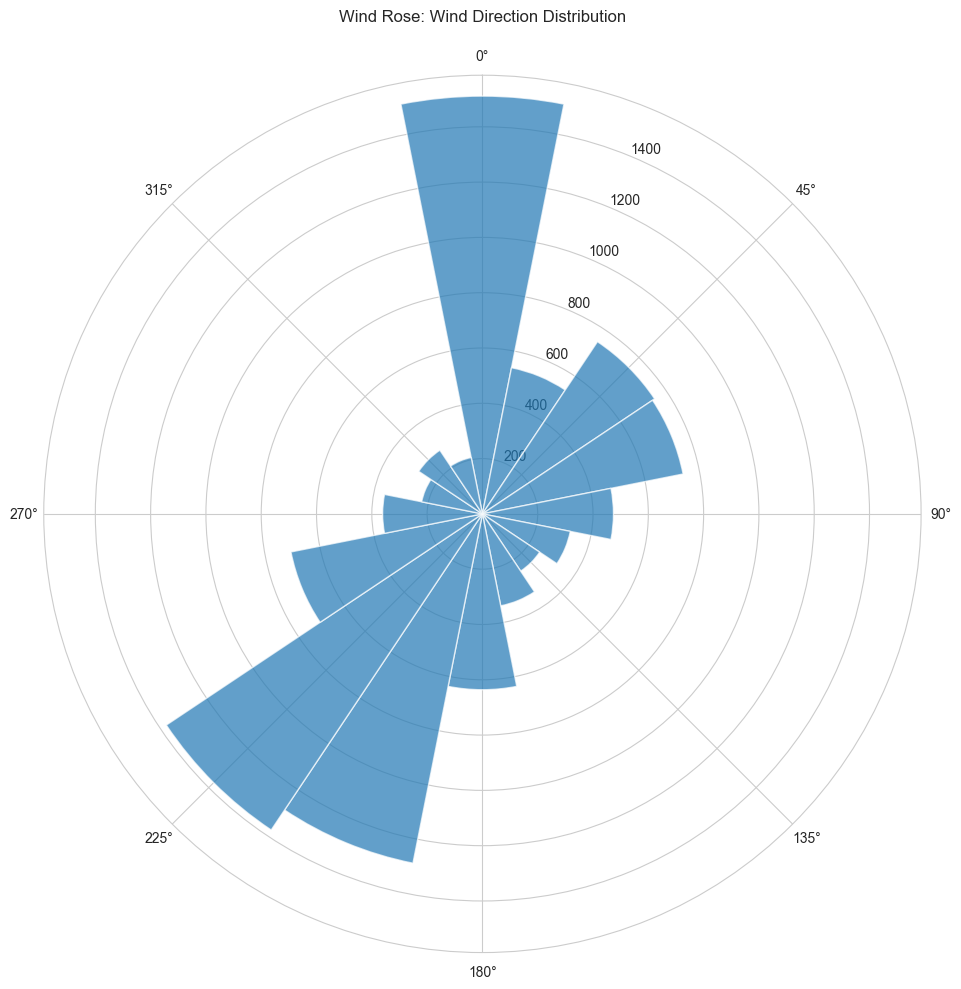

In [102]:
# Wind Rose Plot (Polar Plot)
# Sample data
sample_df = df_clean.sample(n=min(10000, len(df_clean)), random_state=42)

# Create wind direction histogram (polar plot)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Convert degrees to radians
wd_rad = np.radians(sample_df['WD'].dropna())
ws_values = sample_df.loc[sample_df['WD'].notna(), 'WS']

# Create histogram
hist, bins = np.histogram(wd_rad, bins=16)
width = 2 * np.pi / 16

# Plot
bars = ax.bar(bins[:-1], hist, width=width, alpha=0.7)
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
ax.set_title('Wind Rose: Wind Direction Distribution', pad=20)
plt.tight_layout()
plt.show()


### Part 7.2: Histograms


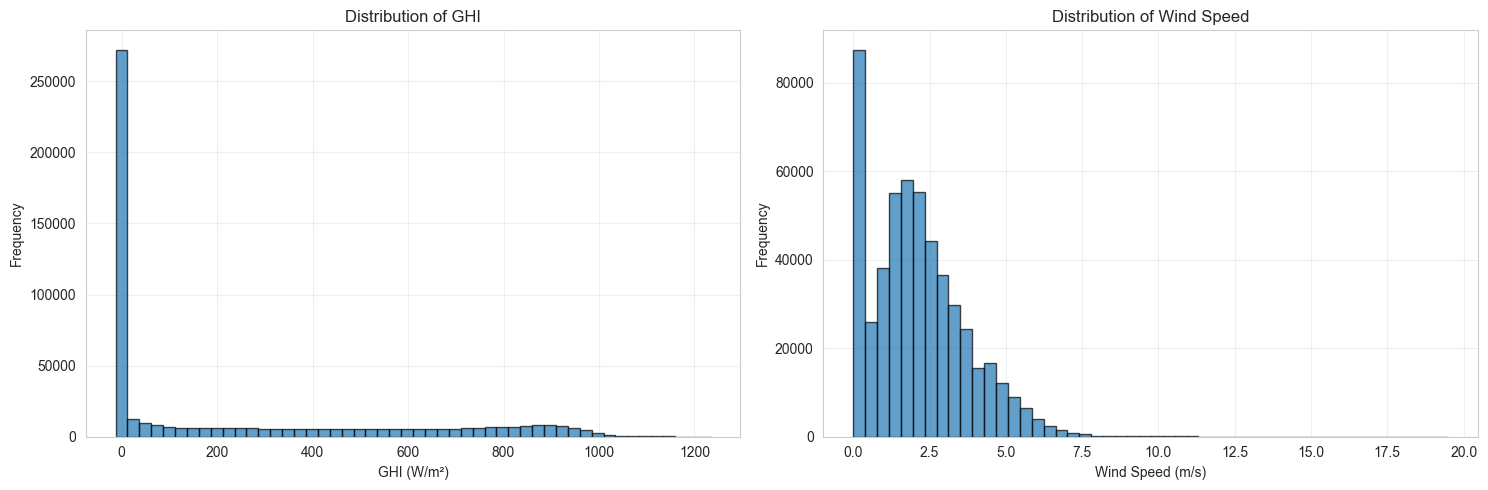

In [103]:
# Histograms for GHI and WS
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# GHI histogram
axes[0].hist(df_clean['GHI'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('GHI (W/m²)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of GHI')
axes[0].grid(True, alpha=0.3)

# WS histogram
axes[1].hist(df_clean['WS'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Wind Speed (m/s)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Wind Speed')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Part 8: Temperature Analysis


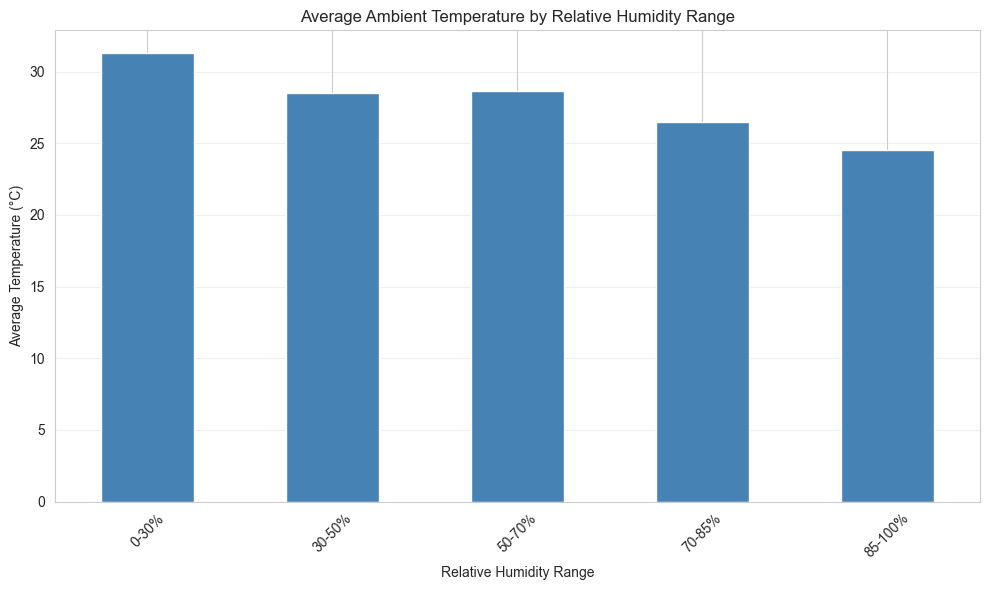

In [104]:
# Temperature Analysis: RH Influence
# Create RH bins
rh_bins = [0, 30, 50, 70, 85, 100]
df_clean['RH_bin'] = pd.cut(df_clean['RH'], bins=rh_bins, 
                            labels=['0-30%', '30-50%', '50-70%', '70-85%', '85-100%'])

# Average temperature by RH bin
temp_by_rh = df_clean.groupby('RH_bin')['Tamb'].mean()

# Plot
plt.figure(figsize=(10, 6))
temp_by_rh.plot(kind='bar', color='steelblue')
plt.title('Average Ambient Temperature by Relative Humidity Range')
plt.xlabel('Relative Humidity Range')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


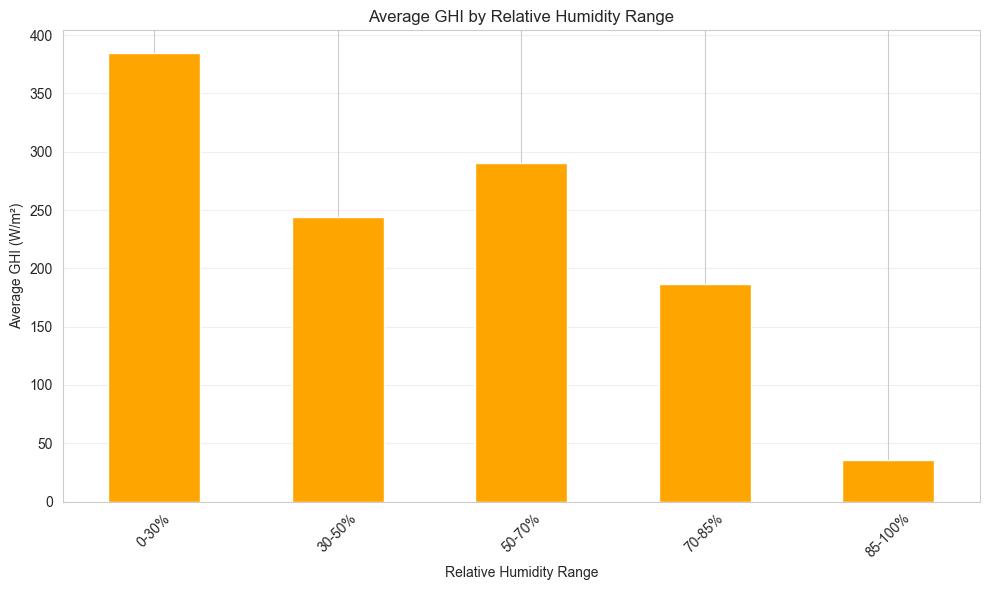

In [106]:
# RH Influence on Solar Radiation
# RH influence on GHI
ghi_by_rh = df_clean.groupby('RH_bin')['GHI'].mean()

# Plot
plt.figure(figsize=(10, 6))
ghi_by_rh.plot(kind='bar', color='orange')
plt.title('Average GHI by Relative Humidity Range')
plt.xlabel('Relative Humidity Range')
plt.ylabel('Average GHI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


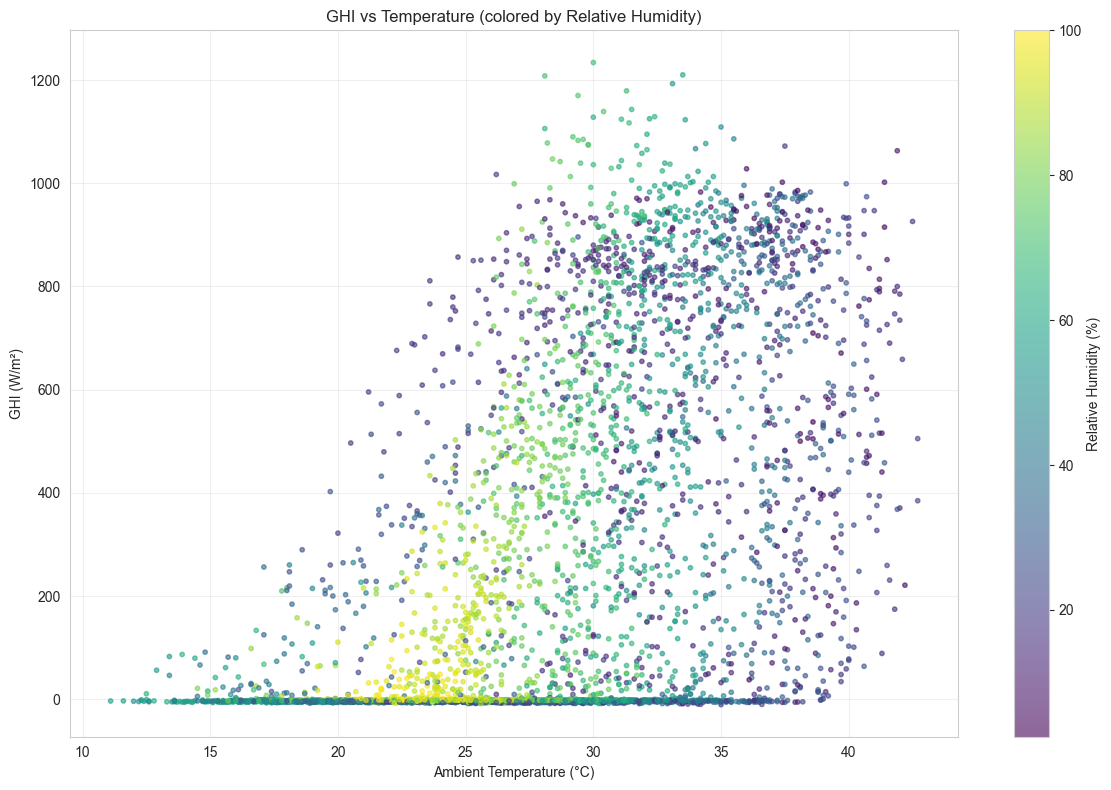

In [107]:
# Combined Analysis: GHI vs Temperature (colored by RH)
sample_df = df_clean.sample(n=min(5000, len(df_clean)), random_state=42)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(sample_df['Tamb'], sample_df['GHI'], 
                     c=sample_df['RH'], cmap='viridis', 
                     alpha=0.6, s=10)
plt.colorbar(scatter, label='Relative Humidity (%)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Temperature (colored by Relative Humidity)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Part 9: Bubble Chart


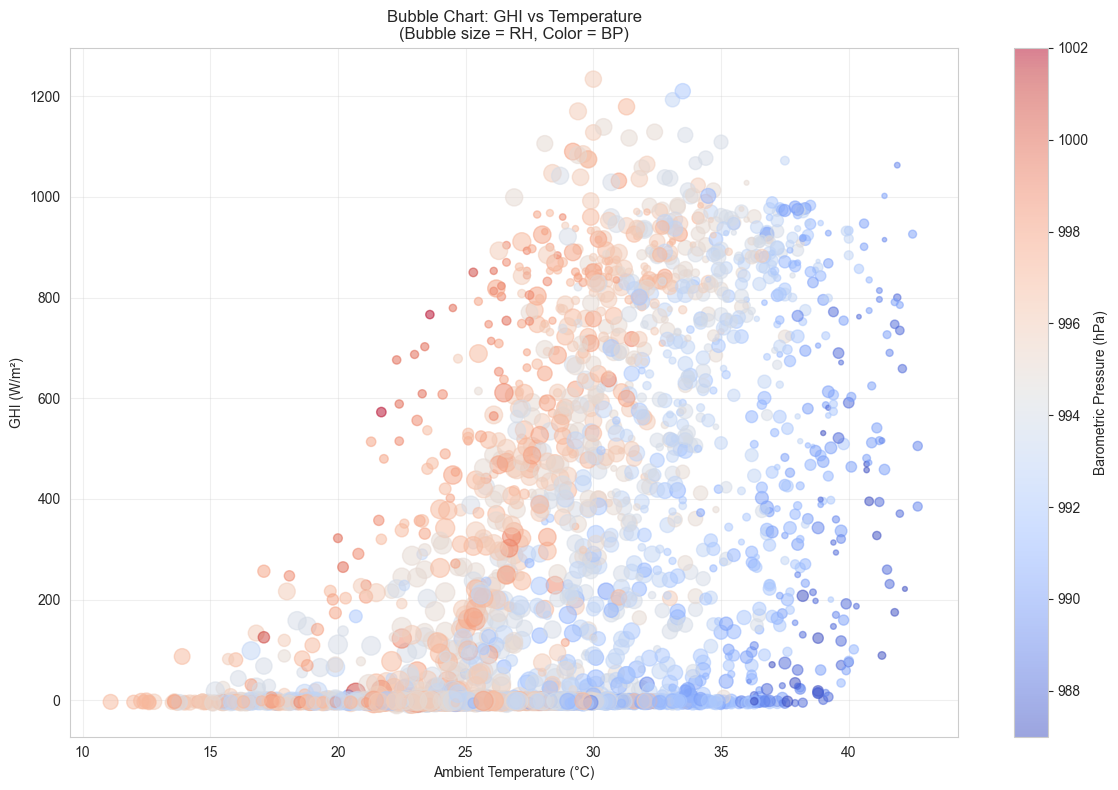

In [109]:
# Bubble Chart: GHI vs Tamb with Bubble Size = RH
sample_df = df_clean.sample(n=min(3000, len(df_clean)), random_state=42)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(sample_df['Tamb'], sample_df['GHI'], 
                     s=sample_df['RH']*2,  # Scale bubble size
                     alpha=0.5, c=sample_df['BP'], cmap='coolwarm')
plt.colorbar(scatter, label='Barometric Pressure (hPa)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('Bubble Chart: GHI vs Temperature\n(Bubble size = RH, Color = BP)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Part 10: Summary and Key Insights


In [111]:
# Key Insights Summary
print("=" * 70)
print("KEY INSIGHTS SUMMARY - BENIN")
print("=" * 70)

print(f"\n1. DATA QUALITY & CLEANING:")
print(f"   - Total rows: {len(df):,}")
print(f"   - Rows after cleaning: {len(df_clean):,}")
print(f"   - Missing values (before): {df.isna().sum().sum():,}")
print(f"   - Missing values (after): {df_clean.isna().sum().sum():,}")

# Calculate cleaning statistics
print(f"\n   CLEANING ACTIONS PERFORMED:")
# Count outliers that were capped
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
total_outliers_capped = 0
for col in outlier_cols:
    if col in df.columns:
        before_max = df[col].max()
        after_max = df_clean[col].max()
        before_min = df[col].min()
        after_min = df_clean[col].min()
        if before_max != after_max or before_min != after_min:
            outliers = outlier_flags[f'{col}_outlier'].sum() if f'{col}_outlier' in outlier_flags.columns else 0
            total_outliers_capped += outliers
            print(f"     • {col}: {outliers:,} outliers capped (|Z| > 3)")

# Count negative values (these are expected for night time, but document them)
negative_ghi_before = (df['GHI'] < 0).sum()
negative_ghi_after = (df_clean['GHI'] < 0).sum()
print(f"     • Negative GHI values: {negative_ghi_before:,} (night-time readings, expected)")
print(f"     • Total rows affected by cleaning: {total_outliers_capped:,} ({total_outliers_capped/len(df)*100:.2f}%)")

print(f"\n2. SOLAR RADIATION (After Cleaning):")
print(f"   - Average GHI: {df_clean['GHI'].mean():.2f} W/m²")
print(f"   - Max GHI: {df_clean['GHI'].max():.2f} W/m²")
print(f"   - Min GHI: {df_clean['GHI'].min():.2f} W/m²")
print(f"   - Average DNI: {df_clean['DNI'].mean():.2f} W/m²")
print(f"   - Average DHI: {df_clean['DHI'].mean():.2f} W/m²")

print(f"\n3. WEATHER CONDITIONS:")
print(f"   - Average Temperature: {df_clean['Tamb'].mean():.2f} °C")
print(f"   - Temperature Range: {df_clean['Tamb'].min():.2f} to {df_clean['Tamb'].max():.2f} °C")
print(f"   - Average RH: {df_clean['RH'].mean():.2f} %")
print(f"   - Average Wind Speed: {df_clean['WS'].mean():.2f} m/s")
print(f"   - Max Wind Speed: {df_clean['WS'].max():.2f} m/s")

print(f"\n4. CLEANING IMPACT (Sensor Maintenance):")
if 'Cleaning' in df_clean.columns:
    cleaning_impact = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
    if len(cleaning_impact) > 1:
        moda_before = cleaning_impact.loc[0, 'ModA']
        moda_after = cleaning_impact.loc[1, 'ModA']
        modb_before = cleaning_impact.loc[0, 'ModB']
        modb_after = cleaning_impact.loc[1, 'ModB']
        moda_improvement = moda_after - moda_before
        modb_improvement = modb_after - modb_before
        print(f"   - ModA: {moda_before:.2f} → {moda_after:.2f} W/m² (improvement: +{moda_improvement:.2f} W/m²)")
        print(f"   - ModB: {modb_before:.2f} → {modb_after:.2f} W/m² (improvement: +{modb_improvement:.2f} W/m²)")
        print(f"   - Cleaning events: {cleaning_counts.get(1, 0):,}")

print(f"\n5. KEY CORRELATIONS:")
if 'GHI' in corr_matrix.columns and 'Tamb' in corr_matrix.columns:
    print(f"   - GHI vs Tamb: {corr_matrix.loc['GHI', 'Tamb']:.3f} (strong positive)")
if 'GHI' in corr_matrix.columns and 'RH' in corr_matrix.columns:
    print(f"   - GHI vs RH: {corr_matrix.loc['GHI', 'RH']:.3f} (moderate negative)")
if 'GHI' in corr_matrix.columns and 'WS' in corr_matrix.columns:
    print(f"   - GHI vs WS: {corr_matrix.loc['GHI', 'WS']:.3f} (moderate positive)")

print(f"\n6. TEMPORAL PATTERNS:")
if 'Month' in df_clean.columns:
    monthly_ghi = df_clean.groupby('Month')['GHI'].mean()
    best_month = monthly_ghi.idxmax()
    worst_month = monthly_ghi.idxmin()
    month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                   7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    print(f"   - Best month for solar: {month_names.get(best_month, best_month)} ({monthly_ghi[best_month]:.2f} W/m²)")
    print(f"   - Worst month for solar: {month_names.get(worst_month, worst_month)} ({monthly_ghi[worst_month]:.2f} W/m²)")

print(f"\n7. DATA EXPORT:")
print(f"   - Cleaned data exported to: ./data/{country_name}_clean.csv")
print(f"   - Export shape: {df_clean.reset_index().shape}")

print("\n" + "=" * 70)


KEY INSIGHTS SUMMARY - BENIN

1. DATA QUALITY & CLEANING:
   - Total rows: 525,600
   - Rows after cleaning: 525,600
   - Missing values (before): 525,600
   - Missing values (after): 0

   CLEANING ACTIONS PERFORMED:
     • GHI: 89 outliers capped (|Z| > 3)
     • DHI: 3,738 outliers capped (|Z| > 3)
     • ModA: 27 outliers capped (|Z| > 3)
     • ModB: 63 outliers capped (|Z| > 3)
     • Negative GHI values: 258,847 (night-time readings, expected)
     • Total rows affected by cleaning: 3,917 (0.75%)

2. SOLAR RADIATION (After Cleaning):
   - Average GHI: 240.55 W/m²
   - Max GHI: 1233.95 W/m²
   - Min GHI: -12.90 W/m²
   - Average DNI: 167.19 W/m²
   - Average DHI: 115.10 W/m²

3. WEATHER CONDITIONS:
   - Average Temperature: 28.18 °C
   - Temperature Range: 11.00 to 43.80 °C
   - Average RH: 54.49 %
   - Average Wind Speed: 2.12 m/s
   - Max Wind Speed: 19.50 m/s

4. CLEANING IMPACT (Sensor Maintenance):
   - ModA: 236.52 → 307.23 W/m² (improvement: +70.71 W/m²)
   - ModB: 228.81 